In [72]:
# import libraries
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Ground Truth : 5')

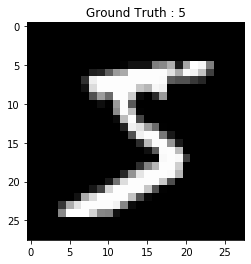

In [73]:
# Loading data and plotting the digit
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()
#display the first image in the training data
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
# plt.show()

In [74]:
# Processing the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)
#convert data to float and scale values between 0 and 1
train_data.astype('float')
test_data.astype('float')

#Run the same code without scaling the images, how the accuracy changes? I commented the scaling step
#scale data
#train_data //=255
#test_data //=255
#change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [75]:
#creating network

# change the number of hidden layer and the activation to tanh or sigmoid and see what happens
 
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(512, activation='tanh'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1,
          validation_data=(test_data, test_labels_one_hot))


Epoch 1/20
235/235 [==============================] - 4s 17ms/step - loss: 0.4346 - accuracy: 0.8858 - val_loss: 0.2616 - val_accuracy: 0.9221
Epoch 2/20
235/235 [==============================] - 4s 17ms/step - loss: 0.1593 - accuracy: 0.9547 - val_loss: 0.2222 - val_accuracy: 0.9333
Epoch 3/20
235/235 [==============================] - 7s 29ms/step - loss: 0.1226 - accuracy: 0.9641 - val_loss: 0.1132 - val_accuracy: 0.9683
Epoch 4/20
235/235 [==============================] - 5s 23ms/step - loss: 0.1051 - accuracy: 0.9694 - val_loss: 0.1222 - val_accuracy: 0.9634
Epoch 5/20
235/235 [==============================] - 7s 28ms/step - loss: 0.0932 - accuracy: 0.9722 - val_loss: 0.1204 - val_accuracy: 0.9645
Epoch 6/20
235/235 [==============================] - 5s 21ms/step - loss: 0.0820 - accuracy: 0.9755 - val_loss: 0.0882 - val_accuracy: 0.9724
Epoch 7/20
235/235 [==============================] - 5s 20ms/step - loss: 0.0761 - accuracy: 0.9776 - val_loss: 0.0974 - val_accuracy: 0.9711

In [70]:
# Evaluation
predict1 = model.predict_classes(test_data[[0], :])
print(predict1)
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)

print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))
print("*********************************")
print(history.history.keys())

[7]
313/313 [==============================] - 1s 4ms/step - loss: 0.1341 - accuracy: 0.9620
Evaluation result on Test Data : Loss = 0.13408632576465607, accuracy = 0.9620000123977661
*********************************
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


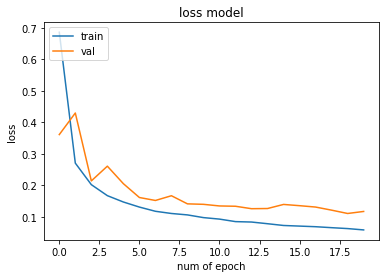

In [65]:
# question 1
# using history object for plotting loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss model')
plt.ylabel('loss')
plt.xlabel('num of epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

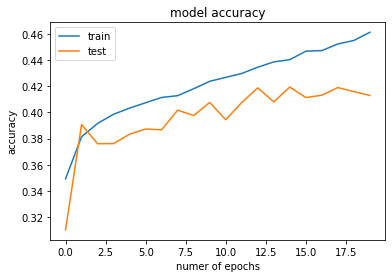

In [54]:
# using history object for plotting accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy model')
plt.ylabel('accuracy')
plt.xlabel('numer of epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

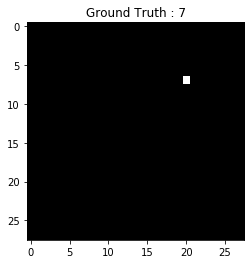

The prediction of the 10th in the test dataset is:  [7]
313/313 [==============================] - 1s 3ms/step - loss: 1.6483 - accuracy: 0.4129
Evaluation result on Test Data : Loss = 1.648270845413208, accuracy = 0.41290000081062317


In [55]:
# question 2

plt.imshow(test_images[10, :, :], cmap='gray')
plt.title('Ground Truth : {}'.format(test_labels[0]))
plt.show()
predict_test = model.predict_classes(test_data[[10], :])
print("The prediction of the 10th in the test dataset is: ", predict_test)
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))